In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
#  Converts the CSV into a Pandas DataFrame
#  Using relative location, for absolute location use pd.read_csv(r'FILEPATH')
data = pd.read_csv('Solar_Energy_Production.csv')
data['date'] = pd.to_datetime(data['date'])

In [11]:
#  Creates a copy of the data set with only date and kwh production
df_dkwh = data.drop(columns=['name', 'id', 'address', 'public_url', 'installationDate', 'uid'])
df_dkwh = df_dkwh.set_index('date')
df_dkwh = df_dkwh.groupby([df_dkwh.index.date])['kWh'].sum()
df_dkwh = df_dkwh.reset_index()
df_dkwh = df_dkwh.rename(columns={'index': 'date'})
#  We create new columns for the year, month and day so that it can be inout more easily into our models.
#  The datetime is still kept so we have an easy input for plotting our data
features = ["year", "month", "day"]
df_dkwh[features] = df_dkwh.apply(lambda row: pd.Series({"year":row.date.year, "month":row.date.month, "day":row.date.day}), axis=1)
print(df_dkwh)

            date       kWh  year  month  day
0     2015-09-01   286.013  2015      9    1
1     2015-09-02   681.646  2015      9    2
2     2015-09-03   647.906  2015      9    3
3     2015-09-04   102.448  2015      9    4
4     2015-09-05    93.432  2015      9    5
...          ...       ...   ...    ...  ...
2711  2023-03-12  1705.099  2023      3   12
2712  2023-03-13  1476.824  2023      3   13
2713  2023-03-14  1988.782  2023      3   14
2714  2023-03-15  2983.315  2023      3   15
2715  2023-03-16  3513.182  2023      3   16

[2716 rows x 5 columns]


In [4]:
#  Splits the testing and training sets before and after target date
split_date = pd.Timestamp('2021-01-01')
dftest = df_dkwh.loc[df_dkwh['date'] >= split_date.date()]
dftrain = df_dkwh.loc[df_dkwh['date'] < split_date.date()]

In [5]:
#  Setting up training and testing sets
testplot = dftest['date']
trainplot = dftrain['date']
Xtest = dftest.drop(columns=['kWh', 'date'])
Ytest = dftest['kWh']
Xtrain = dftrain.drop(columns=['kWh', 'date'])
Ytrain = dftrain['kWh']

In [6]:
#  Reshaping data
Ytrain = Ytrain.array.reshape((-1, 1))
Ytest = Ytest.array.reshape((-1, 1))

In [7]:
#  Instantiating the models
modelLR = LinearRegression()
modelLR.fit(Xtrain, Ytrain)
modelDTR = DecisionTreeRegressor()
modelDTR.fit(Xtrain, Ytrain)

DecisionTreeRegressor()

In [8]:
#  Predictions
LRpred = modelLR.predict(Xtest)
DTRpred = modelDTR.predict(Xtest)

In [9]:
#Testing
print(mean_squared_error(LRpred, Ytest))
print(mean_squared_error(DTRpred, Ytest))

21413838.735271372
8352505.767681678


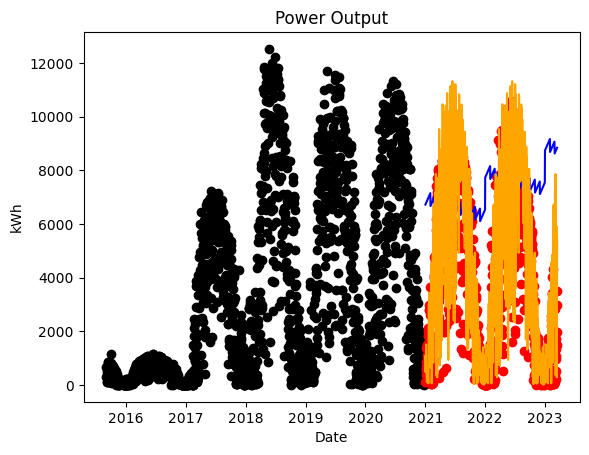

In [10]:
#  Plotting
plt.title('Power Output')
plt.xlabel('Date')
plt.ylabel('kWh')

plt.scatter(trainplot, Ytrain, color='black')
plt.plot(testplot, LRpred, color='blue')  # Linear Regression plot
plt.plot(testplot, DTRpred, color='orange')  # DT Regressor plot
plt.scatter(testplot, Ytest, color='red')  # Testing reference plot

plt.show()